In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

CHHS_Path = "./Resources/CHHS_Vaccines_Administered_by_County/130d7ba2-b6eb-438d-a412-741bde207e1c (1).csv"
Census_Path = "./Resources/Census_Demo_Stats_by_County/ACSDP5Y2019.DP02_data_with_overlays_2021-08-05T001535.csv"

censusDemo_df = pd.read_csv(Census_Path)

#Fixes header for the census dataframe
newHeader = censusDemo_df.iloc[0]
censusDemo_df = censusDemo_df[1:]
censusDemo_df.columns = newHeader

CHHS_df = pd.read_csv(CHHS_Path)

In [2]:
countyList = ["Alameda", "Alpine", "Amador", "Butte", "Calaveras", "Colusa", "Contra Costa", "Del Norte", "El Dorado", "Fresno", 
              "Glenn", "Humboldt", "Imperial", "Inyo", "Kern", "Kings", "Lake", "Lassen", "Los Angeles", "Madera", 
              "Marin", "Mariposa", "Mendocino", "Merced", "Modoc", "Mono", "Monterey", "Napa", "Nevada", "Orange", "Placer", 
              "Plumas", "Riverside", "Sacramento", "San Benito", "San Bernardino", "San Diego", "San Francisco", "San Joaquin", 
              "San Luis Obispo", "San Mateo", "Santa Barbara", "Santa Clara", "Santa Cruz", "Shasta", "Sierra", "Siskiyou", "Solano", 
              "Sonoma", "Stanislaus", "Sutter", "Tehama", "Trinity", "Tulare", "Tuolumne", "Ventura", "Yolo", "Yuba"]

county_df = pd.DataFrame({"County" : []})

#add list of counties to dataframe
county_df["County"] = countyList

#remove numerical index and replace with county names
county_df.set_index("County", inplace = True)


In [3]:
#compile dataframe for use with plots 
for x in countyList:
    county_df.loc[x, "Total Population"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Estimate!!ANCESTRY!!Total population'].sum()
    
    #data type for Total Pop needs to be cast as float instead of string to easily calc percentages
    county_df['Total Population'] = county_df["Total Population"].apply(pd.to_numeric, downcast = 'float')
    county_df.loc[x, "Total Fully Vaccinated"] = CHHS_df.loc[CHHS_df['county'] == x, "fully_vaccinated"].sum()
    county_df["% of Pop Fully Vaccinated"] = (county_df["Total Fully Vaccinated"] / county_df["Total Population"]) * 100
    
    county_df.loc[x, "Avg People per Household"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average household size'].sum()
    county_df.loc[x, "Total Households"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Estimate!!COMPUTERS AND INTERNET USE!!Total households'].sum()
    
    county_df.loc[x, "Grandparents living w/ grandchildren under 18"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years'].sum()
    #data type for grandparents needs to be cast as float instead of string to easily calc percentages
    county_df['Grandparents living w/ grandchildren under 18'] = county_df["Grandparents living w/ grandchildren under 18"].apply(pd.to_numeric, downcast = 'float')
    county_df["% of Pop with Grandparents living w/ grandchildren under 18"] = (county_df["Grandparents living w/ grandchildren under 18"] / county_df["Total Population"]) * 100
    
    county_df.loc[x, "% Households w/ Computer"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a computer'].sum()
    county_df.loc[x, "% Households w/ Broadband Internet Sub"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription'].sum()
    county_df.loc[x, "Education, People 25 years and over: % Less than 9th grade"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade'].sum()
    county_df.loc[x, "Education, People 25 years and over: % 9th to 12th grade, no diploma"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma'].sum()
    county_df.loc[x, "Education, People 25 years and over: % High school graduate (includes equivalency)"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)'].sum()
    county_df.loc[x, "Education, People 25 years and over: % Some college, no degree"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree'].sum()
    county_df.loc[x, "Education, People 25 years and over: % Associate's degree"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree"].sum()
    county_df.loc[x, "Education, People 25 years and over: % Bachelor's degree"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree"].sum()
    county_df.loc[x, "Education, People 25 years and over: % Graduate or professional degree"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree"].sum()
    county_df.loc[x, "Education, People 25 years and over: % High school graduate or higher"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate or higher"].sum()
    county_df.loc[x, "Civilian population 18 years and over: % Civilian Veterans"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), 'Percent!!VETERAN STATUS!!Civilian population 18 years and over!!Civilian veterans'].sum()
    county_df.loc[x, "% CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years!!With a disability"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years!!With a disability"].sum()
    county_df.loc[x, "% CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over!!With a disability"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over!!With a disability"].sum()
    county_df.loc[x, "% Population born outside the United States, Entered 2010 or later"] = censusDemo_df.loc[censusDemo_df['Geographic Area Name'] == (x + ' County, California'), "Percent!!YEAR OF ENTRY!!Population born outside the United States!!Foreign born!!Entered 2010 or later"].sum()
county_df

,Total Population,Total Fully Vaccinated,% of Pop Fully Vaccinated,Avg People per Household,Total Households,Grandparents living w/ grandchildren under 18,% of Pop with Grandparents living w/ grandchildren under 18,% Households w/ Computer,% Households w/ Broadband Internet Sub,"Education, People 25 years and over: % Less than 9th grade",...,"Education, People 25 years and over: % High school graduate (includes equivalency)","Education, People 25 years and over: % Some college, no degree","Education, People 25 years and over: % Associate's degree","Education, People 25 years and over: % Bachelor's degree","Education, People 25 years and over: % Graduate or professional degree","Education, People 25 years and over: % High school graduate or higher",Civilian population 18 years and over: % Civilian Veterans,% CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years!!With a disability,% CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over!!With a disability,"% Population born outside the United States, Entered 2010 or later"
County,,,,,,,,,,,,,,,,,,,,,
Alameda,1656754.0,1085847.0,65.540629,2.82,577177,44432.0,2.681871,94.3,88.9,5.9,...,17.6,17.2,6.3,27.3,20.1,88.4,3.7,6.6,32.2,21.6
Alpine,1039.0,689.0,66.313763,2.87,350,55.0,5.293551,92.9,82.6,5.2,...,28.1,23.5,5.1,21.2,13.4,91.2,9.4,15.4,23.5,49.1
Amador,38429.0,15481.0,40.284681,2.38,14594,1066.0,2.773947,90.8,84.6,2.4,...,27.5,29.5,13.8,13.1,6.1,90.0,11.7,15.0,35.1,13.1
Butte,225817.0,88630.0,39.248595,2.57,85320,4152.0,1.838657,92.5,85.4,3.9,...,22.5,29.6,10.0,18.0,9.2,89.2,7.9,14.7,38.5,12.6
Calaveras,45514.0,18304.0,40.216197,2.66,16942,1002.0,2.201520,89.6,82.3,2.7,...,28.0,33.0,10.8,12.2,6.1,90.2,11.9,18.1,36.8,14.8
Colusa,21454.0,8758.0,40.822224,2.94,7227,630.0,2.936515,86.8,81.0,19.1,...,26.2,20.7,9.4,11.1,3.9,71.3,5.3,11.4,32.5,8.6
Contra Costa,1142251.0,751992.0,65.834217,2.87,394769,29811.0,2.609847,95.2,91.7,5.6,...,17.3,21.4,8.4,26.2,16.1,89.5,5.3,8.9,31.7,17.0
Del Norte,27495.0,9385.0,34.133479,2.47,9945,888.0,3.229678,89.2,79.7,5.0,...,31.0,26.0,8.2,8.7,6.1,80.1,9.5,18.2,42.7,11.2
El Dorado,188563.0,93938.0,49.817833,2.63,70974,3347.0,1.775004,94.1,87.2,2.2,...,21.3,26.7,11.2,22.6,11.7,93.4,9.0,10.3,31.6,13.3


In [20]:
#function for scatter plot and linear regression
def plotScatterLinearRegression(xValues, yValues, title, xLabel, yLabel, textCoordinates):
    
    #regression formula
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
    regressValues = xValues * slope + intercept
    lineEquation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    #scatter plot and regression line plot
    plt.scatter(xValues, yValues, edgecolor = "orange")
    plt.plot(xValues, regressValues, "r-", color = "red")
    plt.annotate(lineEquation, textCoordinates, fontsize = 13, color = "red")
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title)
    print(f"r = {round(rvalue,2)}")
    plt.grid()
    plt.show()

r = 0.15


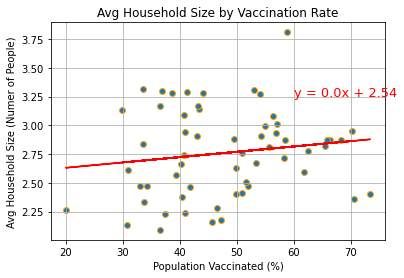

In [30]:
#Avg Household Size by Vaccination Rate
percentFullVaccinated = county_df["% of Pop Fully Vaccinated"]
avgPeopleHouse = county_df["Avg People per Household"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, avgPeopleHouse, "Avg Household Size by Vaccination Rate", "Population Vaccinated (%)", "Avg Household Size (Numer of People)", (60,3.25))

r = 0.65


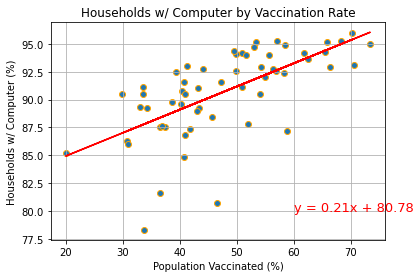

In [29]:
#
yValueScatter = county_df["% Households w/ Computer"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "Households w/ Computer by Vaccination Rate", "Population Vaccinated (%)", "Households w/ Computer (%)", (60,80))

r = 0.01


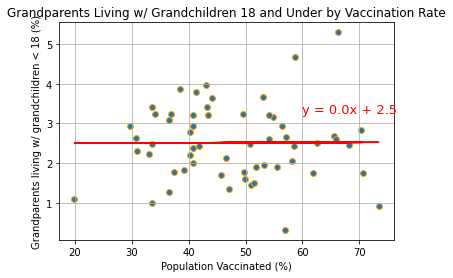

In [31]:
#% of Pop with Grandparents living w/ grandchildren under 18 by Vaccination Rate
yValueScatter = county_df["% of Pop with Grandparents living w/ grandchildren under 18"]

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "Grandparents Living w/ Grandchildren 18 and Under by Vaccination Rate", "Population Vaccinated (%)", "Grandparents living w/ grandchildren < 18 (%)", (60,3.25))

r = 0.68


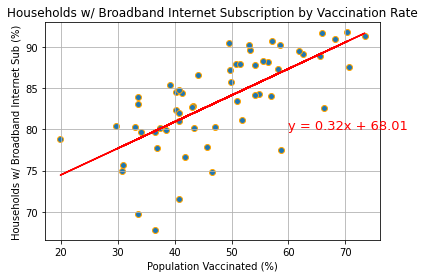

In [32]:
#
yValueScatter = county_df["% Households w/ Broadband Internet Sub"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "Households w/ Broadband Internet Subscription by Vaccination Rate", "Population Vaccinated (%)", "Households w/ Broadband Internet Sub (%)", (60,80))

r = -0.07


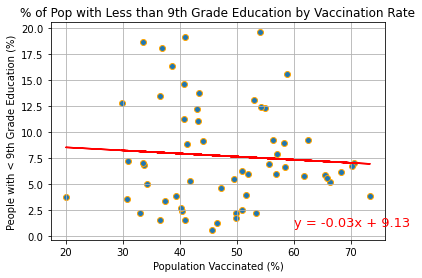

In [35]:
#
yValueScatter = county_df["Education, People 25 years and over: % Less than 9th grade"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop with Less than 9th Grade Education by Vaccination Rate", "Population Vaccinated (%)", "People with < 9th Grade Education (%)", (60,1))

r = -0.63


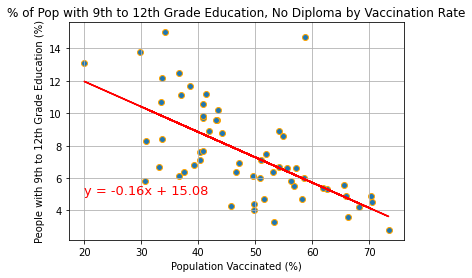

In [39]:
#
yValueScatter = county_df["Education, People 25 years and over: % 9th to 12th grade, no diploma"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop with 9th to 12th Grade Education, No Diploma by Vaccination Rate", "Population Vaccinated (%)", "People with 9th to 12th Grade Education (%)", (20,5))

r = -0.78


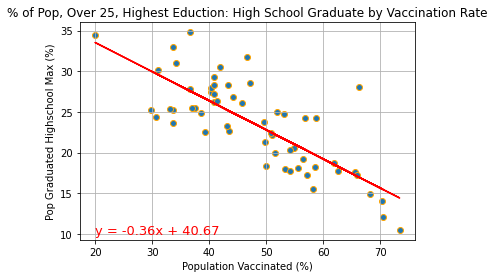

In [41]:
#
yValueScatter = county_df["Education, People 25 years and over: % High school graduate (includes equivalency)"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop, Over 25, Highest Education: High School Graduate by Vaccination Rate", "Population Vaccinated (%)", "Pop Graduated Highschool Max (%)", (20,10))

r = -0.63


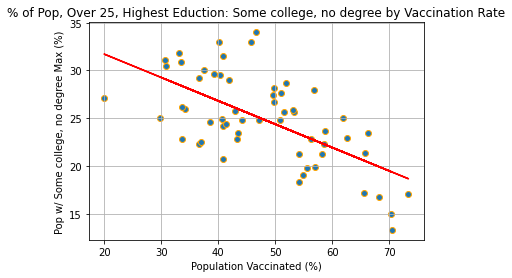

In [42]:
#
yValueScatter = county_df["Education, People 25 years and over: % Some college, no degree"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop, Over 25, Highest Education: Some college, no degree by Vaccination Rate", "Population Vaccinated (%)", "Pop w/ Some college, no degree Max (%)", (20,10))

r = -0.46


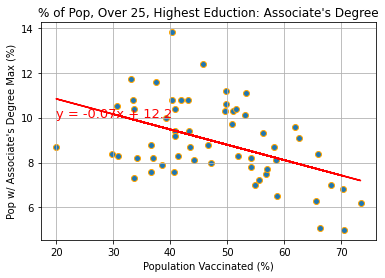

In [43]:
#
yValueScatter = county_df["Education, People 25 years and over: % Associate's degree"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop, Over 25, Highest Education: Associate's Degree", "Population Vaccinated (%)", "Pop w/ Associate's Degree Max (%)", (20,10))

r = 0.84


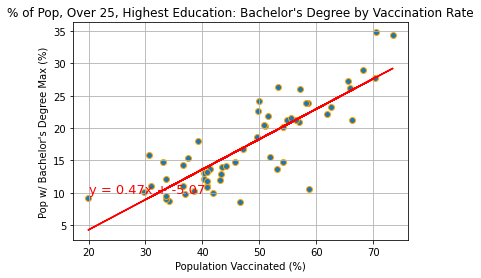

In [44]:
#
yValueScatter = county_df["Education, People 25 years and over: % Bachelor's degree"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop, Over 25, Highest Education: Bachelor's Degree by Vaccination Rate", "Population Vaccinated (%)", "Pop w/ Bachelor's Degree Max (%)", (20,10))

r = 0.84


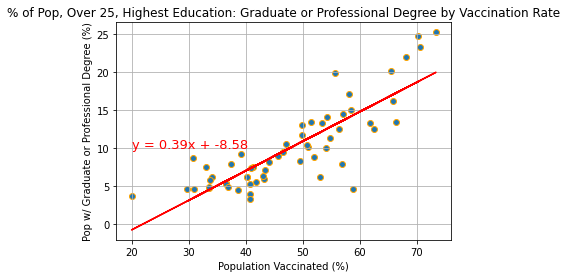

In [45]:
#
yValueScatter = county_df["Education, People 25 years and over: % Graduate or professional degree"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop, Over 25, Highest Education: Graduate or Professional Degree by Vaccination Rate", "Population Vaccinated (%)", "Pop w/ Graduate or Professional Degree (%)", (20,10))

r = -0.5


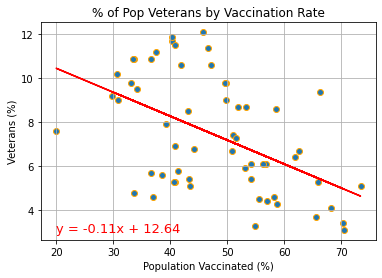

In [49]:
#
yValueScatter = county_df["Civilian population 18 years and over: % Civilian Veterans"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop Veterans by Vaccination Rate", "Population Vaccinated (%)", "Veterans (%)", (20,3))

r = -0.67


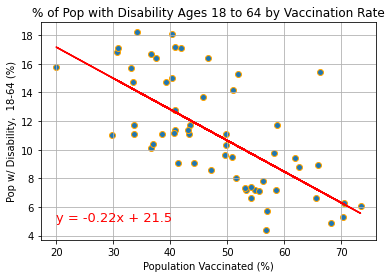

In [48]:
#
yValueScatter = county_df["% CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years!!With a disability"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop with Disability Ages 18 to 64 by Vaccination Rate", "Population Vaccinated (%)", "Pop w/ Disability,  18-64 (%)", (20,5))

r = -0.61


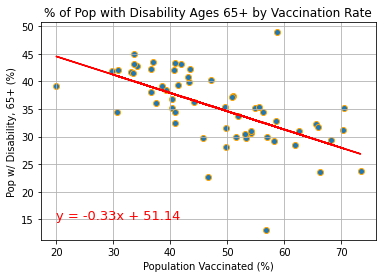

In [51]:
#% of Pop with Disability Ages 65+
yValueScatter = county_df["% CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over!!With a disability"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop with Disability Ages 65+ by Vaccination Rate", "Population Vaccinated (%)", "Pop w/ Disability, 65+ (%)", (20,15))

r = 0.47


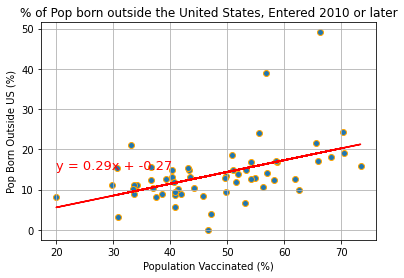

In [52]:
#% of Pop born outside the United States, Entered 2010 or later
yValueScatter = county_df["% Population born outside the United States, Entered 2010 or later"].apply(pd.to_numeric, downcast = 'float')

plotScatterLinearRegression(percentFullVaccinated, yValueScatter, "% of Pop born outside the United States, Entered 2010 or later", "Population Vaccinated (%)", "Pop Born Outside US (%)", (20,15))